In [15]:
import numpy as np
import pandas as pd
import umap
import umap.plot

if __name__ == "__main__":
    print("Loading Rule Data...")
    data = np.load('rule_data.npz')
    diffs = np.load('rule_diff.npz')
    target = np.load('target.npz')
    print("Rule data loaded with shape {}".format(data.shape))

    print("Embedding into two dimensions using umap...")
    embedding = umap.UMAP().fit(data)
    print("Embedding complete.")

    average_diffs = diffs.mean(axis=1)
    hover_data = pd.DataFrame({
        'index': np.arange(data.shape[0]),
        'number': target,
        'average_diff': average_diffs,
    })

Loading Rule Data...
Rule data loaded with shape (262144, 256)
Embedding into two dimensions using umap...
Embedding complete.


In [25]:
with open('all_.npy', 'wb') as f:
    print(embedding.embedding_)

(262144, 2)


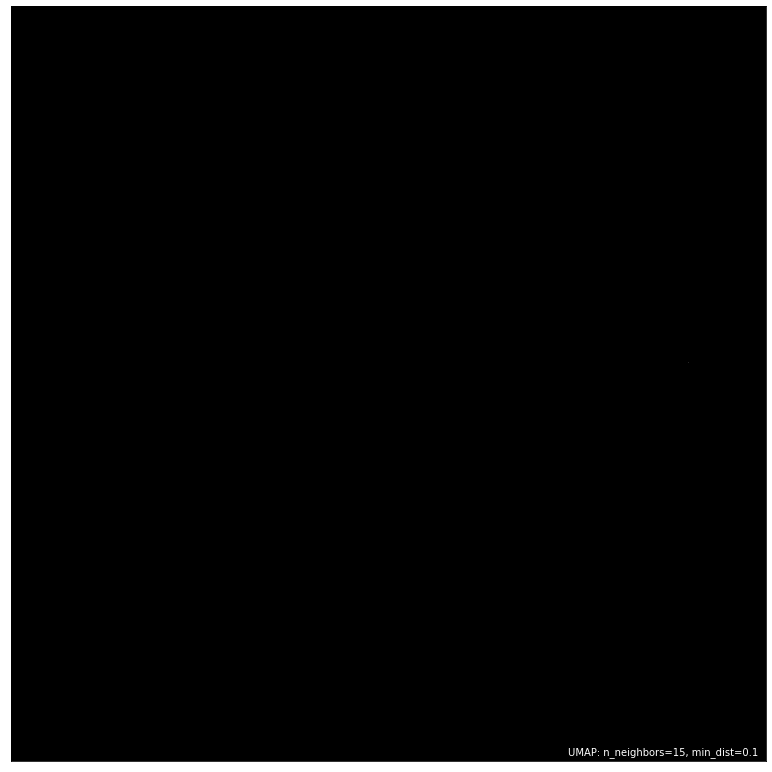

In [14]:
from math import log

def mapper(t):
    if t == 6152:
        return 1000
    else:
        return 1

abs_distance_from_gol = np.array([abs(diff - 3.2392156862745094)**2 for diff in average_diffs])
abs_distance_from_target = np.array([1000/(abs(t - 6152) + 1) for t in target])
filtered_to_gol = np.array([mapper(t) for t in target])

umap.plot.points(
     embedding,
     values=filtered_to_gol,
     theme='fire',
     width=1000,
     height=1000,
)

In [1]:
umap.plot.diagnostic(
     embedding,
     diagnostic_type='vq',
)

NameError: name 'umap' is not defined